<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/Assign10_AssociacaoClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Associação de Clusters

## Importanto as bibliotecas

In [ ]:
!pip install pyfpgrowth

     |████████████████████████████████| 1.6MB 5.1MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5477 sha256=f7f65b507cfca578fb360a41a1acc2c9c222e45f48414650a0a762bd1cefc27b
  Stored in directory: /root/.cache/pip/wheels/3b/3f/0d/a04bb8b17887c1eca7d0f1a48d4aa0c09c96eb221ff7fa56c1
Successfully built pyfpgrowth


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.frequent_patterns import association_rules
import itertools
import warnings
import pyfpgrowth

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Variáveis

In [ ]:
clusters = range(1,7) # range de seis clusters
bases = ['tedio' , 'estresse'] # bases utilizadas de tédio e estresse
emocoes = ['angry', 'disgusted', 'fear', 'sad', 'surprised', 'happy'] # emoções a serem estudadas

log_file = open('/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/Clusters_Centroides.txt','a') # Arquivo de log para guardar as saídas
logs = list() # criando lista para guardar os logs

## Importando as bases 

In [ ]:
# Importando as bases para cada cluster
for cluster in clusters: 
  x = str(cluster)
  path_tedio = '/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster0'+x+'_tedio_estresse/dadosTedioB_cluster'+x+'.xlsx'
  path_estresse = '/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/cluster0'+x+'_tedio_estresse/dadosEstresseB_cluster'+x+'.xlsx'
  globals()['tedio_cluster0' + x] = path_tedio
  globals()['estresse_cluster0' + x] = path_estresse

  globals()['df_tedio_cluster0'+ x] = pd.read_excel(globals()['tedio_cluster0' + x], index_col=0)
  globals()['df_estresse_cluster0'+ x] = pd.read_excel(globals()['estresse_cluster0' + x], index_col=0)

## Limitando as bases as emoções

In [ ]:
for cluster in clusters:
  x = str(cluster)
  globals()['df_tedio_cluster0'+ x] = globals()['df_tedio_cluster0'+ x].loc[:,'angry':'happy']
  globals()['df_estresse_cluster0'+ x] = globals()['df_estresse_cluster0'+ x].loc[:,'angry':'happy']

In [ ]:
df_tedio_cluster01.head(5)

,angry,disgusted,fear,sad,surprised,happy
game_id,,,,,,
1,0.034800,0.057187,0.010910,0.125495,0.191988,0.131196
1,0.040922,0.065980,0.009346,0.123534,0.117035,0.136284
1,0.029513,0.050042,0.009480,0.120868,0.194130,0.185262
1,0.037817,0.071314,0.010974,0.166960,0.150470,0.122635
1,0.040636,0.067900,0.010229,0.137022,0.154919,0.132826


In [ ]:
df_estresse_cluster01.head(5)

,angry,disgusted,fear,sad,surprised,happy
game_id,,,,,,
1,0.100790,0.192510,0.020056,0.143483,0.035893,0.036650
1,0.117206,0.294099,0.019053,0.091390,0.008923,0.050300
1,0.099648,0.265178,0.022462,0.098231,0.013674,0.051873
1,0.125407,0.308587,0.020549,0.103317,0.009624,0.041843
1,0.112386,0.299351,0.021350,0.106606,0.010373,0.046205


## Tratando os dados

In [ ]:
# Minha metodologia, mas com pouco resultado
for cluster in clusters:
  x = str(cluster)
  for base in bases:
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(globals()['df_'+base+'_cluster0'+ x])
    globals()['df2_'+base+'_cluster0'+ x] = scaler.transform(globals()['df_'+base+'_cluster0'+ x])

    globals()['df2_'+base+'_cluster0'+ x] = pd.DataFrame(globals()['df2_'+base+'_cluster0'+ x])
    globals()['df2_'+base+'_cluster0'+ x].columns = globals()['df_'+base+'_cluster0'+ x].columns

    for i in globals()['df2_'+base+'_cluster0'+ x].columns:
      for j in globals()['df2_'+base+'_cluster0'+ x].index:
        if globals()['df2_'+base+'_cluster0'+ x][i][j] >= 0.5:
          globals()['df2_'+base+'_cluster0'+ x][i][j]= 1
        else:  
          globals()['df2_'+base+'_cluster0'+ x][i][j] = 0

In [ ]:
# # Moore-Penrose
# for cluster in clusters:
#   x = str(cluster)
#   for base in bases:
    
#     # scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#     # scaler.fit(globals()['df_'+base+'_cluster0'+ x])
    
#     globals()['matrix_'+base+'_cluster0'+ x] = globals()['df_estresse_cluster0'+ x].to_numpy()
#     globals()['matrix_'+base+'_cluster0'+ x].T
#     globals()['np_data_'+base+'_cluster0'+ x] = np.linalg.pinvh(globals()['matrix_'+base+'_cluster0'+ x].T)
#     globals()['data_'+base+'_cluster0'+ x] = pd.DataFrame(globals()['np_data_'+base+'_cluster0'+ x], columns = ['angry', 'disgusted','fear','sad','surprised','happy'])

#     for i in globals()['data_'+base+'_cluster0'+ x].columns:
#       for j in globals()['data_'+base+'_cluster0'+ x].index:
#         if globals()['data_'+base+'_cluster0'+ x][i][j] <= 0:
#           globals()['data_'+base+'_cluster0'+ x][i][j]= 0
#         else:  
#           globals()['data_'+base+'_cluster0'+ x][i][j] = 1

## Cluter 01 na base Tédio

### Correlação

In [ ]:
data = data_tedio_cluster01

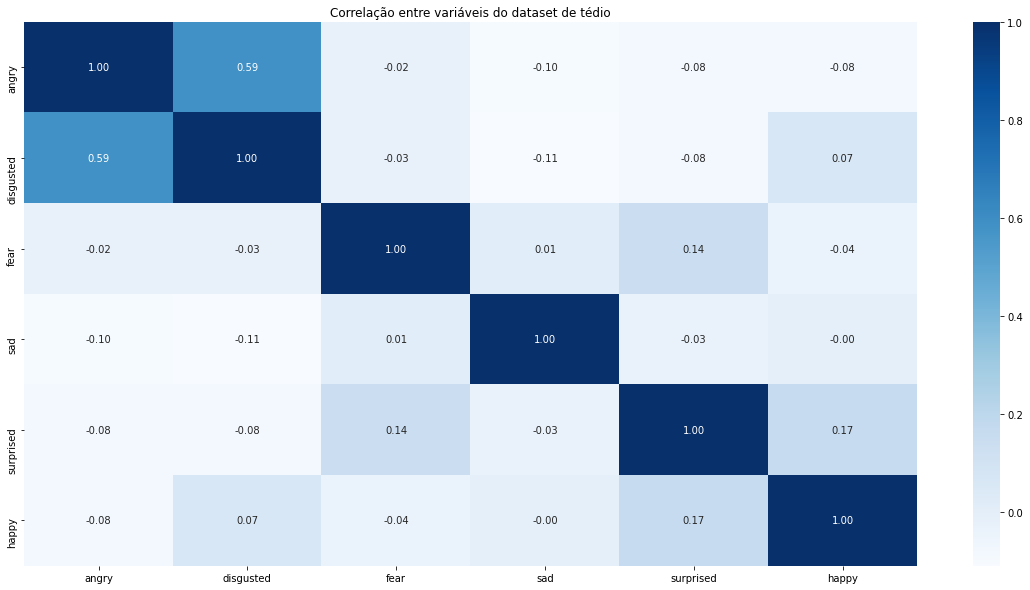

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        1077.0
disgusted    1215.0
fear          113.0
sad          1946.0
surprised    1174.0
happy        2340.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

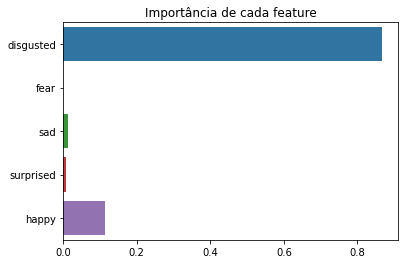

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

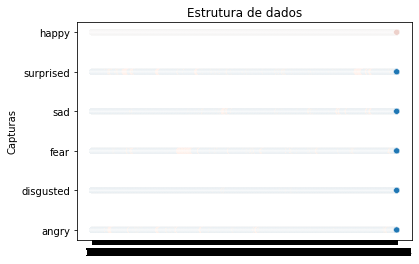

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb526effdd0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 01 na base Estresse

### Correlação

In [ ]:
data = data_estresse_cluster01

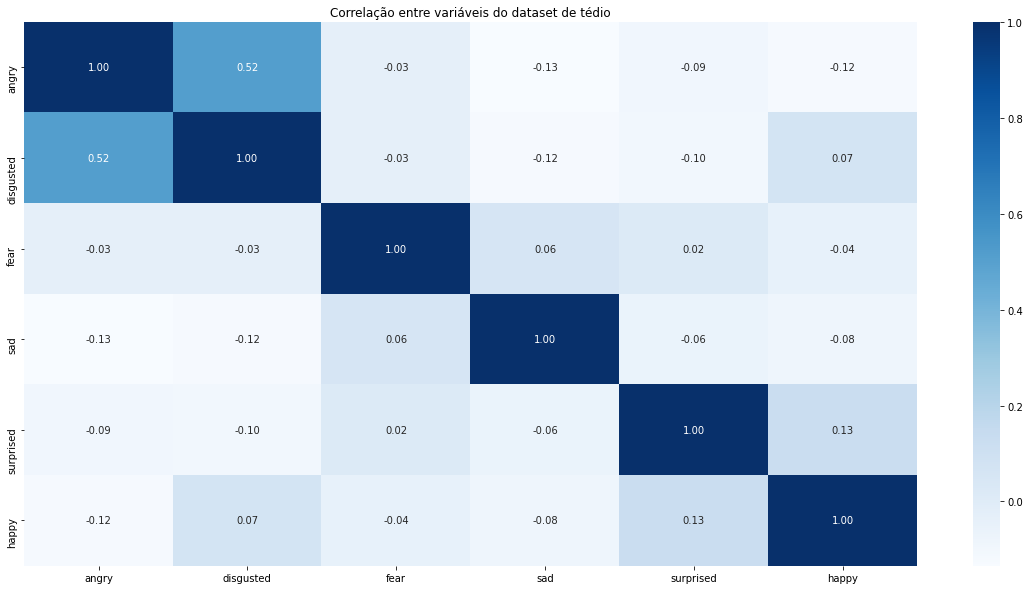

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        1415.0
disgusted    1497.0
fear          119.0
sad          1763.0
surprised     875.0
happy        2071.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

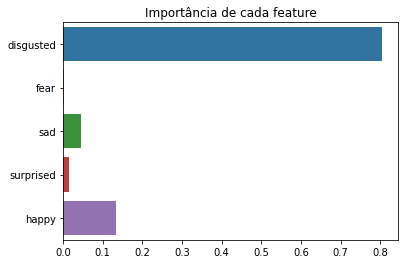

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

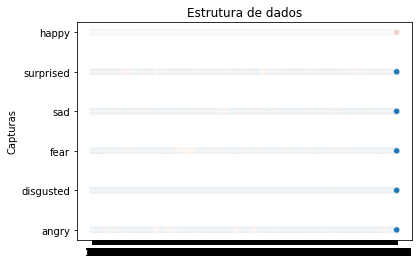

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb51c6b5450>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 02 na base Tédio

### Correlação

In [ ]:
data = data_tedio_cluster02

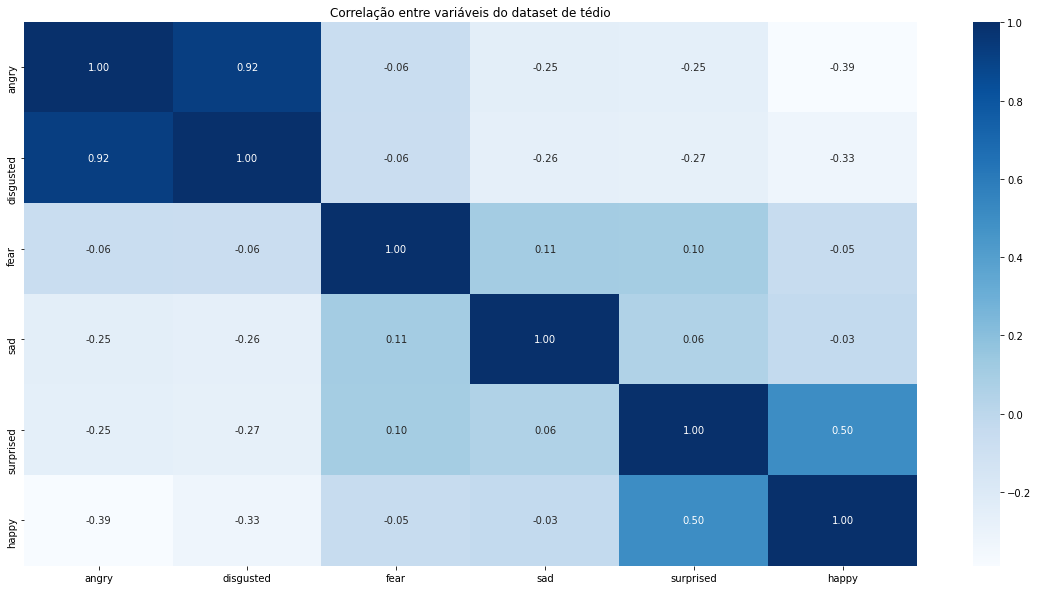

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        180.0
disgusted    193.0
fear           4.0
sad           60.0
surprised     63.0
happy        128.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

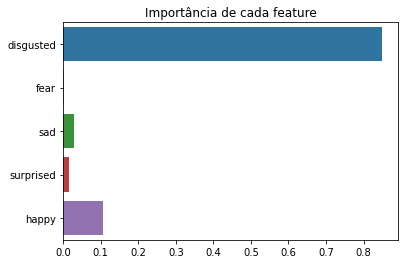

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

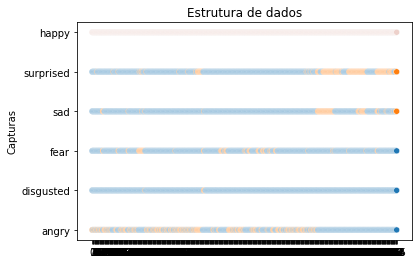

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb51d530450>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 02 na base Estresse

### Correlação

In [ ]:
data = data_estresse_cluster02

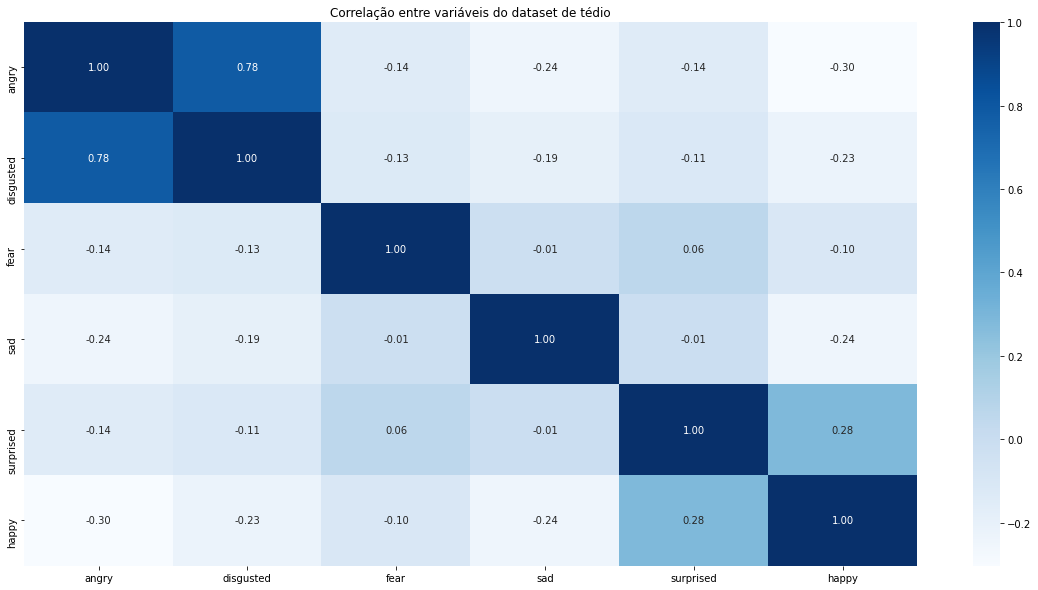

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        118.0
disgusted     80.0
fear          37.0
sad           75.0
surprised     29.0
happy        128.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

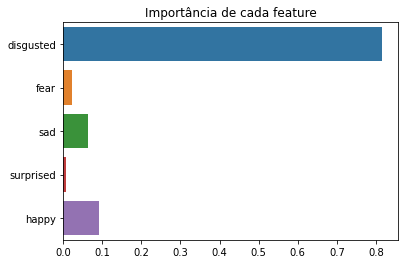

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

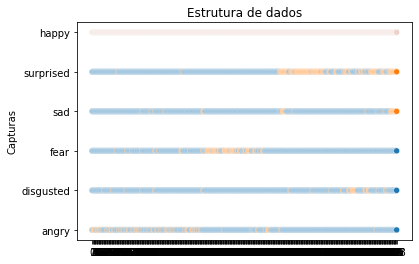

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb514519850>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   1|
|[1.0, 0.0]|   1|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       0.5| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|                  [0.0]|     [1.0]|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],1
2,"[1.0, 0.0]",1


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],0.5,1.0


## Cluter 03 na base Tédio

### Correlação

In [ ]:
data = data_tedio_cluster03

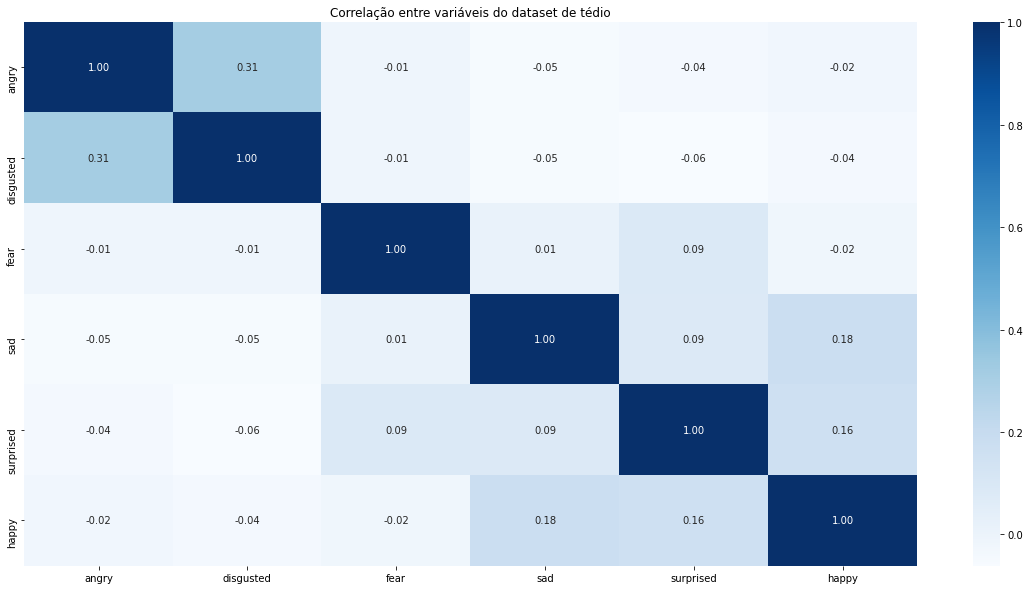

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry         75.0
disgusted    171.0
fear          12.0
sad          303.0
surprised    197.0
happy        299.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

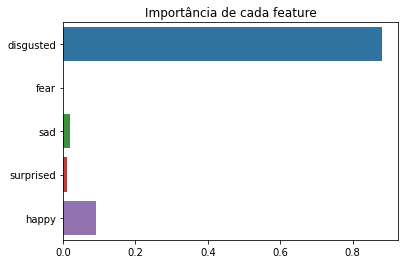

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

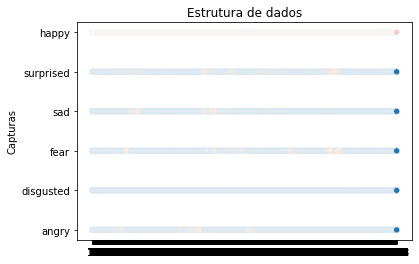

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb51cf10850>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 03 na base Estresse

### Correlação

In [ ]:
data = data_estresse_cluster03

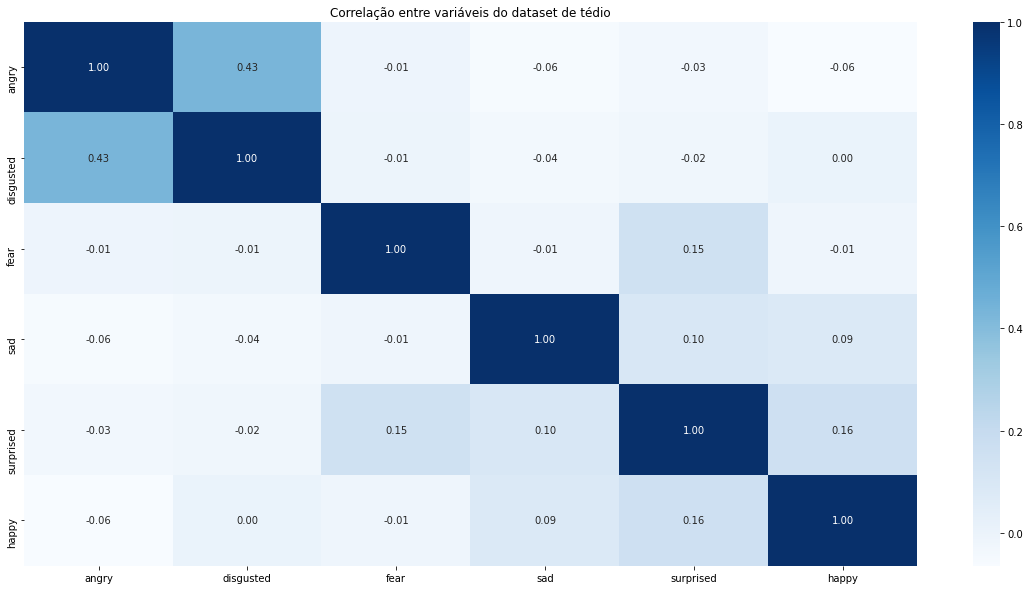

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        111.0
disgusted     55.0
fear           6.0
sad          225.0
surprised     61.0
happy        296.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

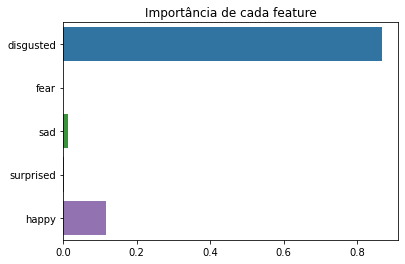

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

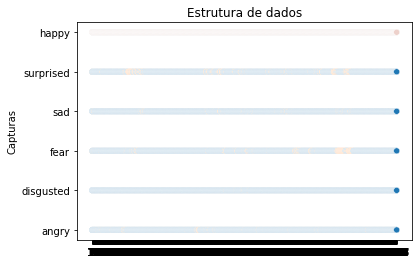

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb514519550>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 04 na base Tédio

### Correlação

In [ ]:
data = data_tedio_cluster04

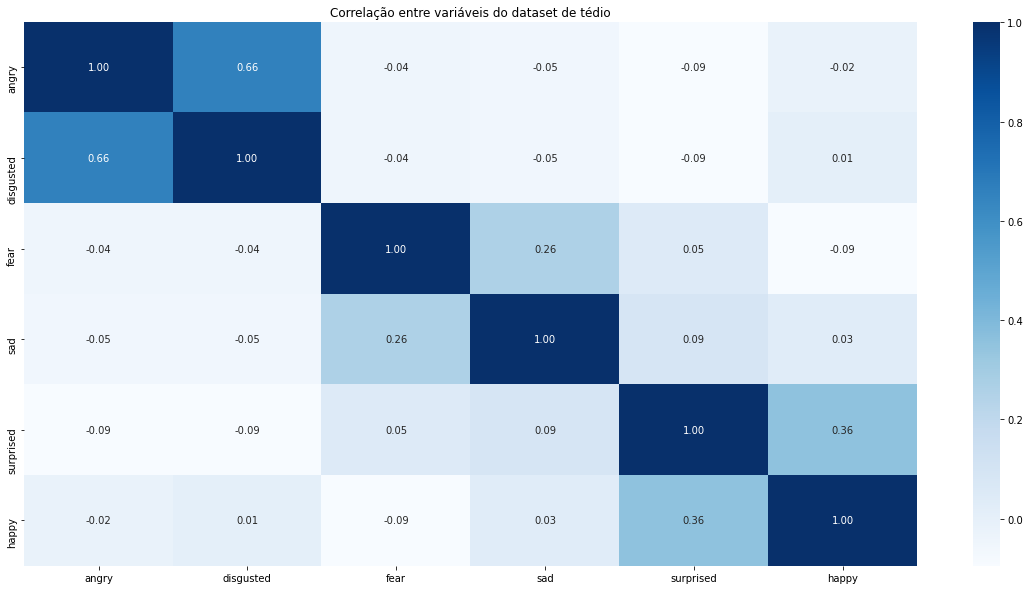

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        108.0
disgusted    107.0
fear         219.0
sad          385.0
surprised    848.0
happy        579.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

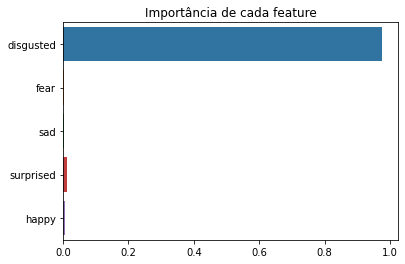

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

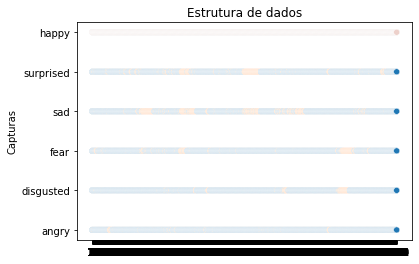

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb5171ee850>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 04 na base Estresse

### Correlação

In [ ]:
data = data_estresse_cluster04

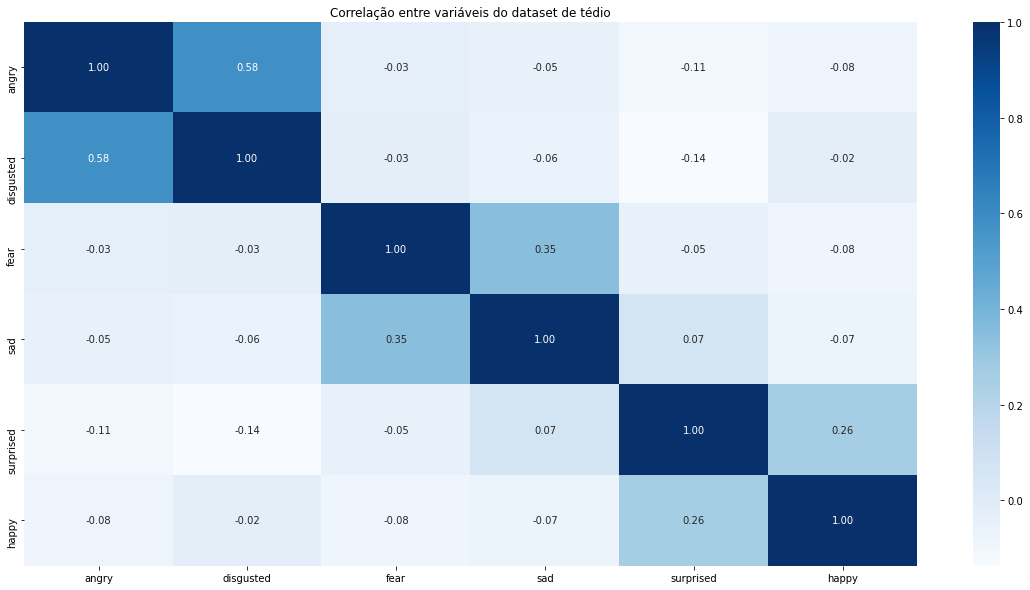

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        122.0
disgusted    203.0
fear         136.0
sad          275.0
surprised    785.0
happy        462.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

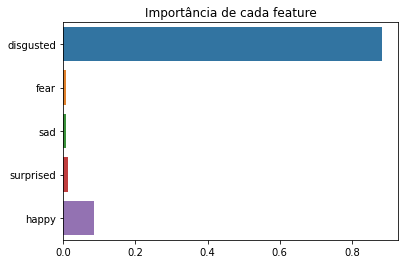

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

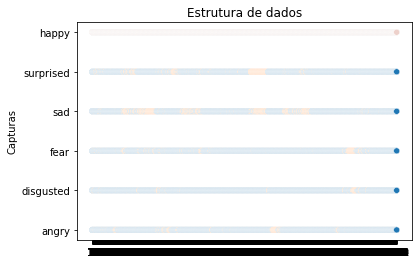

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb5170c87d0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 05 na base Tédio

### Correlação

In [ ]:
data = data_tedio_cluster05

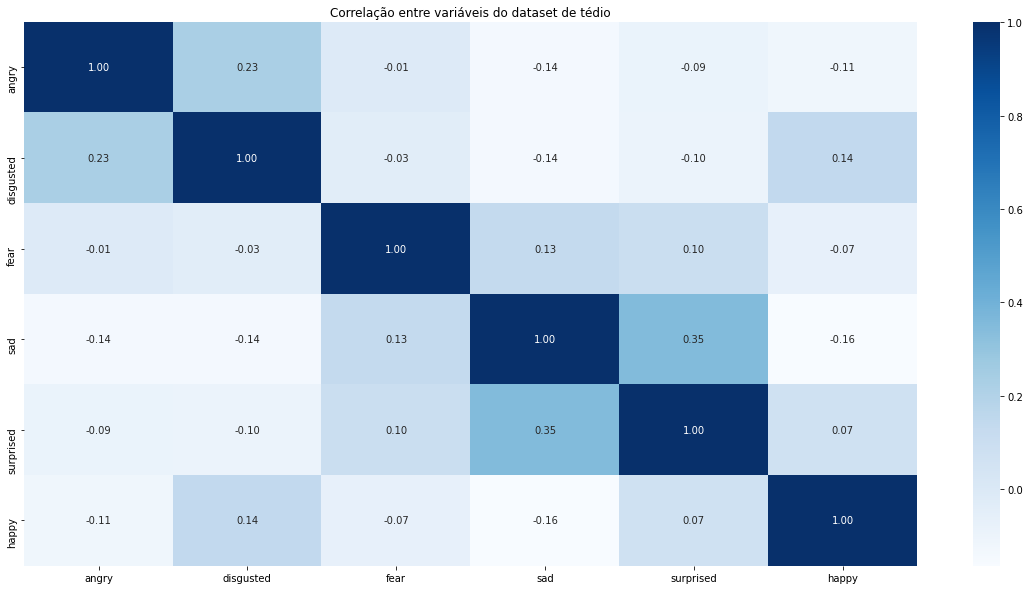

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry         448.0
disgusted     459.0
fear          157.0
sad          1422.0
surprised     738.0
happy        1055.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

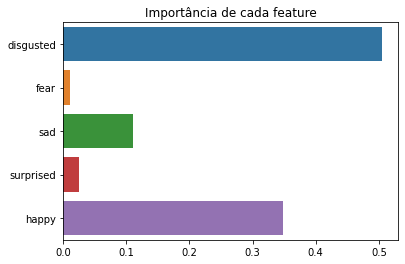

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

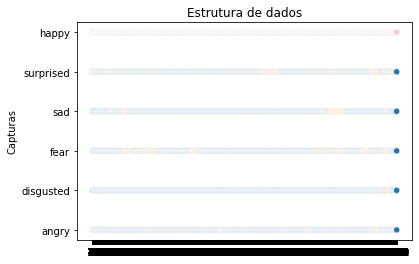

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb52653b5d0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 05 na base Estresse

### Correlação

In [ ]:
data = data_estresse_cluster05

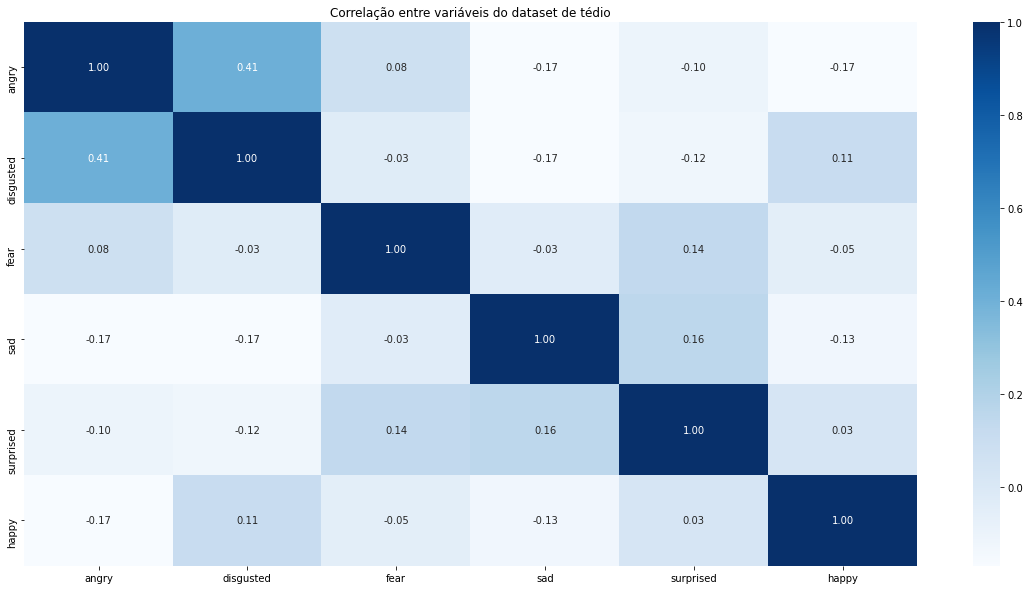

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        784.0
disgusted    771.0
fear          82.0
sad          894.0
surprised    499.0
happy        932.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

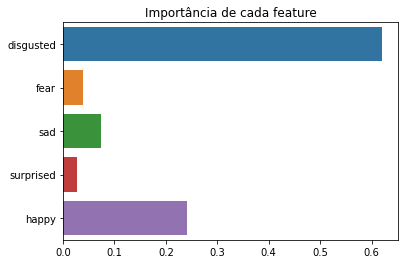

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

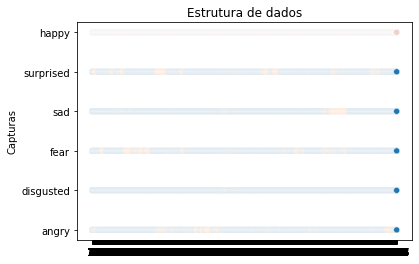

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb51b461d50>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 06 na base Tédio

### Correlação

In [ ]:
data = data_tedio_cluster06

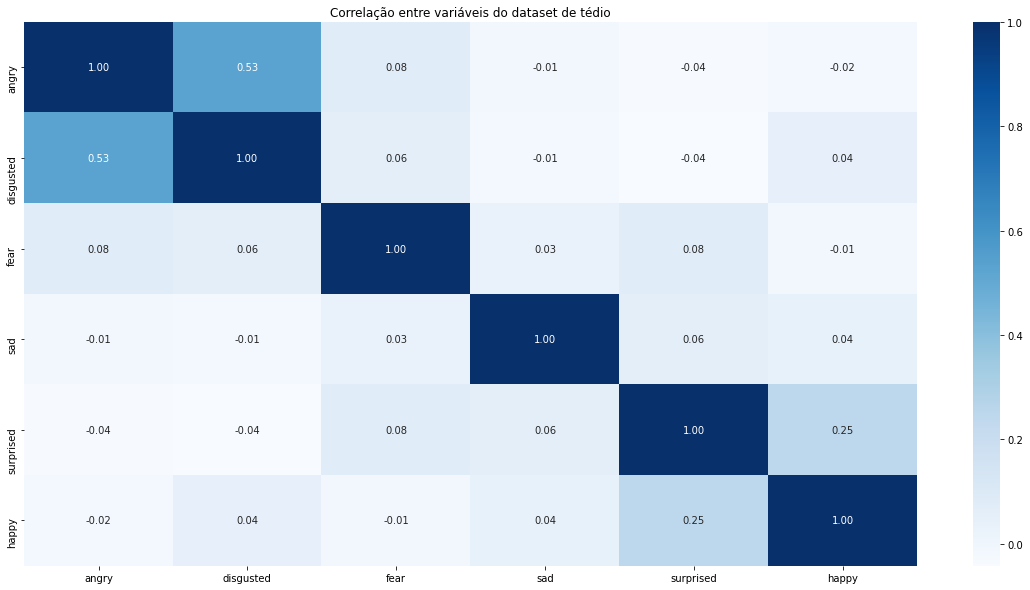

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        303.0
disgusted    390.0
fear          58.0
sad          232.0
surprised    133.0
happy        677.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

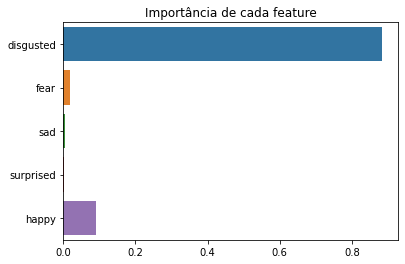

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

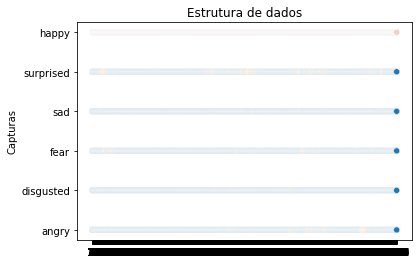

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb51e6abad0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0


## Cluter 06 na base Estresse

### Correlação

In [ ]:
data = data_estresse_cluster06

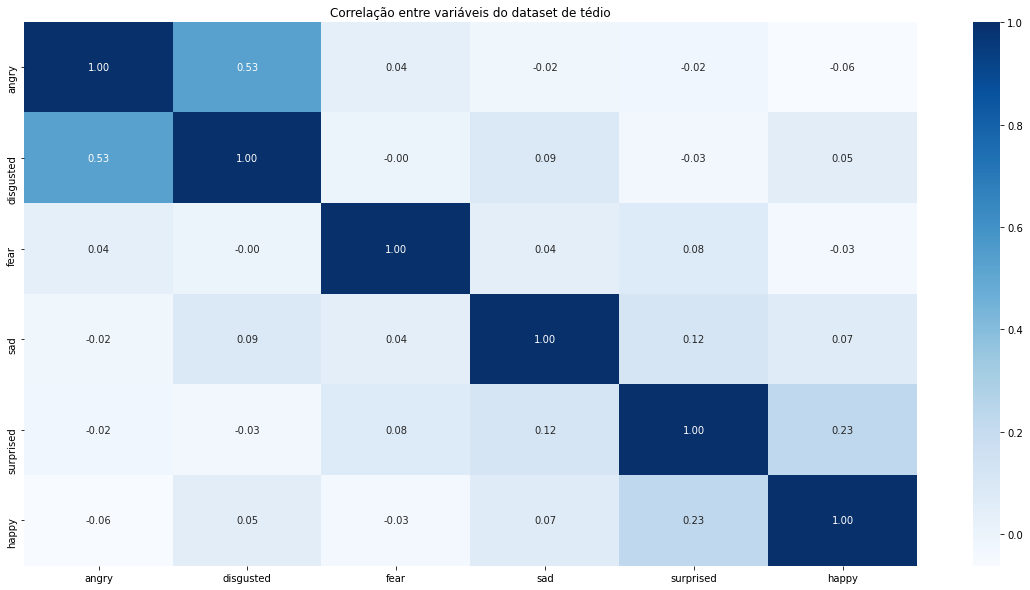

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

In [ ]:
data.sum()

angry        202.0
disgusted    272.0
fear          39.0
sad          183.0
surprised    116.0
happy        696.0
dtype: float64

Text(0.5, 1.0, 'Importância de cada feature')

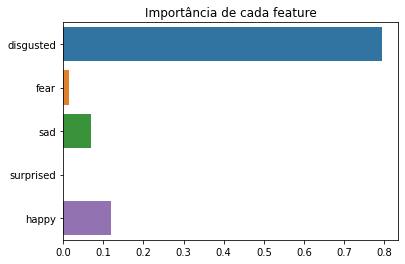

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(data.drop(columns=['angry']), data.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=data.columns[1:6])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

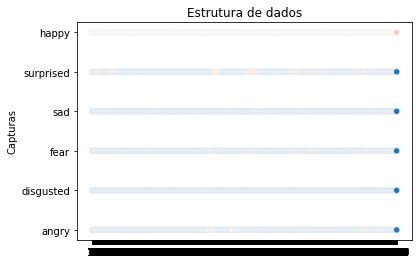

In [ ]:
p = data.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(data.index)
    g.set_yticklabels(data.columns)
    plt.title("Estrutura de dados")

In [ ]:
!pip install apyori
from apyori import apriori as apyori

apyori(data)
# apriori(data, use_colnames=True)

<generator object apriori at 0x7fb532cbf4d0>

### Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(data, min_support=0.6, use_colnames=True)

,support,itemsets


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'angry', 'disgusted'} ]

,support,itemsets,length


### FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(data, 2)

In [ ]:
patterns

{('a',): 4,
 ('a', 'p'): 2,
 ('a', 'p', 'y'): 2,
 ('a', 'r'): 2,
 ('a', 'y'): 2,
 ('d',): 4,
 ('d', 'e'): 3,
 ('d', 'e', 'i'): 3,
 ('d', 'e', 'i', 'r'): 2,
 ('d', 'e', 'i', 'r', 's'): 2,
 ('d', 'e', 'i', 's'): 3,
 ('d', 'e', 'r'): 2,
 ('d', 'e', 'r', 's'): 2,
 ('d', 'e', 'r', 's', 'u'): 2,
 ('d', 'e', 'r', 'u'): 2,
 ('d', 'e', 's'): 6,
 ('d', 'e', 's', 'u'): 3,
 ('d', 'e', 'u'): 3,
 ('d', 'g'): 2,
 ('d', 'g', 's'): 2,
 ('d', 'i'): 3,
 ('d', 'i', 'r'): 2,
 ('d', 'i', 'r', 's'): 2,
 ('d', 'i', 's'): 6,
 ('d', 'r'): 2,
 ('d', 'r', 's'): 2,
 ('d', 'r', 's', 'u'): 2,
 ('d', 'r', 'u'): 2,
 ('d', 's'): 7,
 ('d', 's', 'u'): 6,
 ('d', 'u'): 3,
 ('e', 'i'): 2,
 ('e', 'i', 'r'): 2,
 ('e', 'i', 'r', 's'): 2,
 ('e', 'i', 's'): 4,
 ('e', 'r'): 3,
 ('e', 'r', 's'): 4,
 ('e', 'r', 's', 'u'): 2,
 ('e', 'r', 'u'): 2,
 ('e', 's'): 4,
 ('e', 's', 's'): 2,
 ('e', 's', 'u'): 4,
 ('e', 'u'): 2,
 ('g',): 2,
 ('g', 's'): 2,
 ('i', 'r'): 2,
 ('i', 'r', 's'): 4,
 ('i', 's'): 4,
 ('i', 's', 's'): 2,
 ('p', 'r'): 

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('a', 'p'): (('y',), 1.0),
 ('a', 'y'): (('p',), 1.0),
 ('d',): (('s',), 1.75),
 ('d', 'e'): (('s',), 2.0),
 ('d', 'e', 'i'): (('s',), 1.0),
 ('d', 'e', 'i', 'r'): (('s',), 1.0),
 ('d', 'e', 'r'): (('s',), 1.0),
 ('d', 'e', 'r', 's'): (('u',), 1.0),
 ('d', 'e', 'r', 'u'): (('s',), 1.0),
 ('d', 'e', 'u'): (('s',), 1.0),
 ('d', 'g'): (('s',), 1.0),
 ('d', 'i'): (('s',), 2.0),
 ('d', 'i', 'r'): (('e', 's'), 1.0),
 ('d', 'i', 'r', 's'): (('e',), 1.0),
 ('d', 'r'): (('s',), 1.0),
 ('d', 'r', 's'): (('e',), 1.0),
 ('d', 'r', 's', 'u'): (('e',), 1.0),
 ('d', 'r', 'u'): (('e', 's'), 1.0),
 ('d', 's'): (('e',), 0.8571428571428571),
 ('d', 'u'): (('s',), 2.0),
 ('e', 'i'): (('d', 'r', 's'), 1.0),
 ('e', 'i', 'r'): (('d', 's'), 1.0),
 ('e', 'i', 'r', 's'): (('d',), 1.0),
 ('e', 'i', 's'): (('d',), 0.75),
 ('e', 'r'): (('s',), 1.3333333333333333),
 ('e', 'r', 's', 'u'): (('d',), 1.0),
 ('e', 'r', 'u'): (('d', 's'), 1.0),
 ('e', 's'): (('r',), 1.0),
 ('e', 's', 'u'): (('d',), 0.75),
 ('e', 'u'): (

#### FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(data)

In [ ]:
capturedata = sparkdata.dropDuplicates(['angry', 'disgusted']).sort('angry')
capturedata = capturedata.groupBy("angry").agg(F.collect_list("disgusted")).sort('angry')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(disgusted)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

+----------+----+
|     items|freq|
+----------+----+
|     [0.0]|   2|
|     [1.0]|   2|
|[1.0, 0.0]|   2|
+----------+----+



Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

+----------+----------+----------+----+
|antecedent|consequent|confidence|lift|
+----------+----------+----------+----+
|     [1.0]|     [0.0]|       1.0| 1.0|
|     [0.0]|     [1.0]|       1.0| 1.0|
+----------+----------+----------+----+



Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

+-----+-----------------------+----------+
|angry|collect_list(disgusted)|prediction|
+-----+-----------------------+----------+
|  0.0|             [1.0, 0.0]|        []|
|  1.0|             [1.0, 0.0]|        []|
+-----+-----------------------+----------+



In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift
0,[1.0],[0.0],1.0,1.0
1,[0.0],[1.0],1.0,1.0
